In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as pltv
import gower
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import altair as alt
alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('vegafusion')

In [2]:
df = pd.read_pickle("../data/processed.pkl")
categorical_columns = df.select_dtypes(include=['category']).columns

In [3]:
# with open("../data/data_element_details.pkl", "rb") as file:
#     data_element_details = pickle.load(file)

In [4]:
# keep_cols = []
# for value in data_element_details.values():
#     if value['Section Name'] in ["Health Care Access", "Chronic Health Conditions"] and value['Label'] in df.columns:
#         keep_cols.append(value['Label'])
# df = df[keep_cols]

In [5]:
import pandas as pd
import prince

# Load the dataset
data = df

# Select the categorical columns for MCA
mca_columns = categorical_columns  # Replace with your categorical column names

# Create an instance of the MCA class
mca = prince.MCA(
    n_components=30,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Fit the MCA model to the data
mca.fit(data[mca_columns])

MCA(n_components=30, n_iter=3, random_state=42)

In [6]:
row_coords = mca.row_coordinates(df)

Attempt 0: k=21
silhouette_avg=0.14227264043666116
Attempt 1: k=22
silhouette_avg=0.13307877547781277
Attempt 2: k=23
silhouette_avg=0.14050219521280538
Attempt 3: k=24
silhouette_avg=0.12317502298411379
Attempt 4: k=25
silhouette_avg=0.1279604426494258
Attempt 5: k=26
silhouette_avg=0.1577809798689429
Attempt 6: k=27
silhouette_avg=0.14537403906846003
Attempt 7: k=28
silhouette_avg=0.14600669800719498
Attempt 8: k=29
silhouette_avg=0.1522004051573345
Attempt 9: k=30
silhouette_avg=0.15927925850725957
Attempt 10: k=31
silhouette_avg=0.15295966281971296
Attempt 11: k=32
silhouette_avg=0.15446825220748991
Attempt 12: k=33
silhouette_avg=0.15806561906783215
Attempt 13: k=34
silhouette_avg=0.16743368007470213
Attempt 14: k=35
silhouette_avg=0.15137915103168811
Attempt 15: k=36
silhouette_avg=0.16689406314552518
Attempt 16: k=37
silhouette_avg=0.14601416719211777
Attempt 17: k=38
silhouette_avg=0.1548071216500599
Attempt 18: k=39
silhouette_avg=0.13170507194577555
Attempt 19: k=40
silhouett

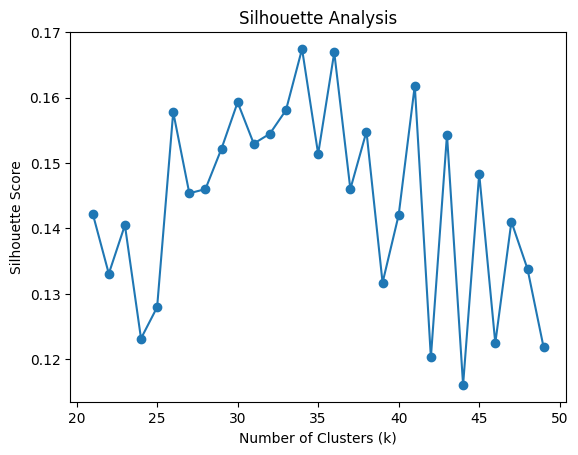

Cluster Labels (Optimal): [33 33 33 ... 32 18 24]
Cluster Centroids (Optimal): [[ 2.91754440e-01 -4.56382675e-02 -1.68614287e-02 ... -1.16229437e-02
   1.28320898e-03  8.18558639e-03]
 [-3.85152294e-01  2.87859769e-01  2.24555552e-01 ...  1.77079830e-02
   1.42558489e-03 -7.23221534e-03]
 [ 6.55440927e-02  3.89945853e-01 -9.57823626e-01 ...  3.13768130e-02
  -4.22333801e-02  1.49943332e-02]
 ...
 [-1.47550932e-01  5.00154043e-01  1.13467779e-01 ...  2.17004286e-02
   1.07721194e-02  5.44623125e-03]
 [ 6.35584862e-02 -2.75846085e-01  8.33631703e-02 ... -3.40264240e-02
  -1.12538139e-02  4.71890538e-03]
 [-4.42168924e-01  2.78224912e-01  2.24147443e-01 ... -1.57212570e-02
  -6.99226735e-04  5.92329121e-03]]


In [7]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Specify the range of k values to try
k_values = range(21, 50)

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Iterate over each k value
for i, k in enumerate(k_values):
    print(f"Attempt {i}: k={k}")
    # Create a MiniBatchKMeans object with the current k value
    mbk = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42)
    
    # Fit the model to the MCA row coordinates
    mbk.fit(row_coords)
    
    # Get the cluster labels for each data point
    labels = mbk.labels_
    
    # Calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(row_coords, labels)
    print(f"silhouette_avg={silhouette_avg}")
    
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Print the optimal number of clusters
print("The optimal number of clusters based on Silhouette Score is", optimal_k)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Create a MiniBatchKMeans object with the optimal k value
mbk_optimal = MiniBatchKMeans(n_clusters=optimal_k, batch_size=100, random_state=42)

# Fit the model to the MCA row coordinates
mbk_optimal.fit(row_coords)

# Get the cluster labels for each data point
labels_optimal = mbk_optimal.labels_

# Get the cluster centers
centroids_optimal = mbk_optimal.cluster_centers_

# Print the cluster labels and centroids for the optimal clustering
print("Cluster Labels (Optimal):", labels_optimal)
print("Cluster Centroids (Optimal):", centroids_optimal)

In [8]:
with open('../data/silhouette_scores_3b.pickle', 'wb') as handle:
    pickle.dump(silhouette_scores, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/mbk_optimal_3b.pickle', 'wb') as handle:
    pickle.dump(mbk_optimal, handle, protocol=pickle.HIGHEST_PROTOCOL)